In [1]:
 # Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
# Read the csv
df = pd.read_csv("./data/new_r.csv", delimiter=";");
df.head()

,kid_id,disease_id,sex,angry,fear,happy,neutral,sad,surprise,frame,stres
0,16,4,1,0.0,0.0,3.070000e-27,0.0,0.0,1.0,1,1
1,16,4,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,2,1
2,16,4,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,3,1
3,16,4,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,4,1
4,16,4,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,5,1


In [3]:
# Getting information about the data
def data_information(df):
    print("Data type: ", df.dtypes)
    print("Data shape: ", df.shape)
    print("Value counts: ", df["stres"].value_counts())

data_information(df)

Data type:  kid_id          int64
disease_id      int64
sex             int64
angry         float64
fear          float64
happy         float64
neutral       float64
sad           float64
surprise      float64
frame           int64
stres           int64
dtype: object
Data shape:  (213690, 11)
Value counts:  1    191037
0     22653
Name: stres, dtype: int64


In [4]:
# Divide dataset into train and test 
def train_test_split_func(df, test_size):
    df_train, df_test = train_test_split(df, test_size=test_size, stratify=df["stres"])

    return df_train, df_test

df_train, df_test = train_test_split_func(df, 0.2)

In [5]:
# Define the features and label 
def split_x_and_y(df_train, df_test):
    df_train_son=df_train

    df_train_x = df_train_son.drop("stres", axis=1)
    df_test_x = df_test.drop("stres", axis=1)

    df_train_y = df_train_son["stres"]
    df_test_y = df_test["stres"]

    return df_train_x, df_test_x, df_train_y, df_test_y

df_train_x, df_test_x, df_train_y, df_test_y = split_x_and_y(df_train, df_test)

In [6]:
# Plot the confusion matrix and show the classification results
def conf_matrix_and_classification_report(df_test_y, predictions, path):
    plt.figure(figsize=(10,16))
    
    cm = confusion_matrix(df_test_y, predictions)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Stressed','Not Stressed'])
    cmd.plot(cmap=plt.cm.Blues)
    cmd.ax_.set(xlabel='Predicted', ylabel='True')
    plt.show()
    cmd.figure_.savefig(path)

    print()
    print(classification_report(df_test_y, predictions))

In [7]:
# Train the dataset and observe predictions
def training_and_prediction(model_name, df_train_x, df_train_y, df_test_x,df_test_y):
    model = model_name
    model.fit(df_train_x, df_train_y)
    
    y_pred = model.predict(df_test_x)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(df_test_y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    return predictions

Accuracy: 96.30%


<Figure size 1000x1600 with 0 Axes>

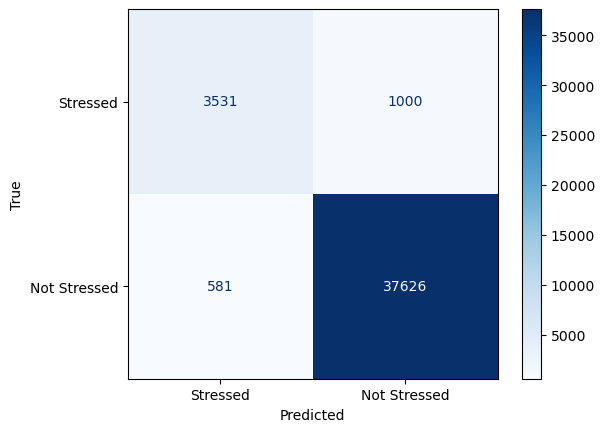


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4531
           1       0.97      0.98      0.98     38207

    accuracy                           0.96     42738
   macro avg       0.92      0.88      0.90     42738
weighted avg       0.96      0.96      0.96     42738



In [8]:
# XGBoost model
preds = training_and_prediction(XGBClassifier(), df_train_x, df_train_y, df_test_x, df_test_y)
path = './results/XGBoost.jpg'
conf_matrix_and_classification_report(df_test_y, preds, path)

Accuracy: 93.81%


<Figure size 1000x1600 with 0 Axes>

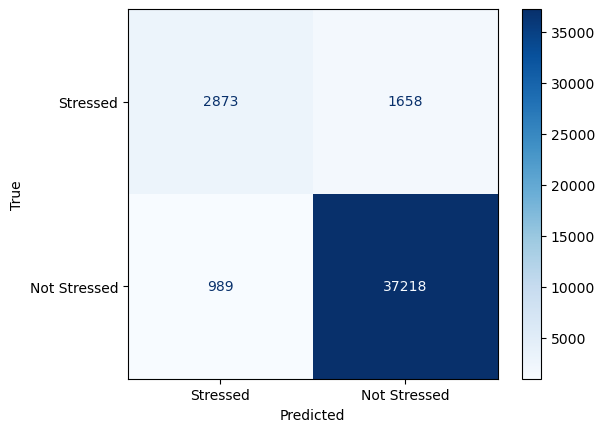


              precision    recall  f1-score   support

           0       0.74      0.63      0.68      4531
           1       0.96      0.97      0.97     38207

    accuracy                           0.94     42738
   macro avg       0.85      0.80      0.83     42738
weighted avg       0.93      0.94      0.94     42738



In [9]:
# KNN model
preds = training_and_prediction(KNeighborsClassifier(), df_train_x, df_train_y, df_test_x, df_test_y)
path = './results/KNN.jpg'
conf_matrix_and_classification_report(df_test_y, preds, path)

Accuracy: 95.69%


<Figure size 1000x1600 with 0 Axes>

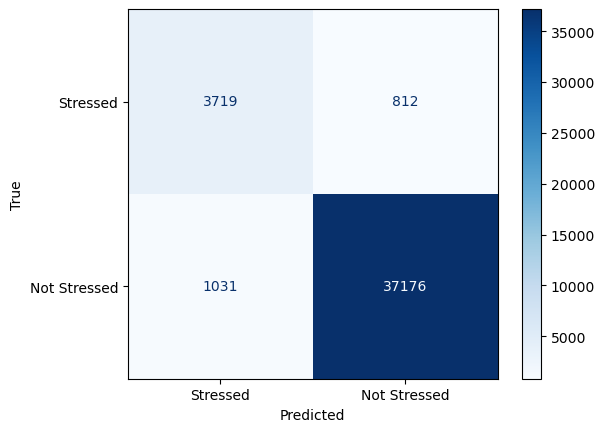


              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4531
           1       0.98      0.97      0.98     38207

    accuracy                           0.96     42738
   macro avg       0.88      0.90      0.89     42738
weighted avg       0.96      0.96      0.96     42738



In [10]:
# DecisionTree model
preds = training_and_prediction(DecisionTreeClassifier(), df_train_x, df_train_y, df_test_x, df_test_y)
path = './results/DecisionTree.jpg'
conf_matrix_and_classification_report(df_test_y, preds, path)